# Applied Neural Networks Homework 1
Leslie Kerby

# **MNIST Digits and Keras**</br>
Import in the MNIST digits dataset (70,000 images, each 28x28 pixels). Preprocess the data as necessary. The training set should have 60k images and the test set 10k. Also create a validation set within the training set -- using 10% of the training data. 

**Part 1** </br>
Using the Keras Sequential API, create a neural network with two hidden layers of 500 neurons each. Train it for 30 epochs. Graph the accuracy and loss for the training and validation sets. Does your model become overfit? If so, at about what epoch? Re-train your neural network for that number of epochs. 

Now test your neural network on your testing data. What accuracy do you achieve? Is it about the same as the accuracy on the validation data?

Plot several of the misclassified images from your model. 

**Part 2** </br>
Try to improve your model by changing your architecture (try different numbers of neurons per layer, and/or more layers) and report again on accuracies and plot several misclassified images.

**Part 3** </br>
Which model did best? Discuss.

Part 1:

11501568/11490434 [==============================] - 0s 0us/step


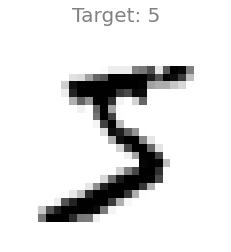

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

np.random.seed(30)
tf.random.set_seed(15)

mnist_digits = keras.datasets.mnist
# the ndarrays that will hold the data sets of 60000 and 10000 numbers
(X_train_full, Y_train_full), (X_test, Y_test) = mnist_digits.load_data()

# plot to see the figure at the desired index '0'
plt.imshow(X_train_full[0], cmap='binary')
plt.axis('off')
plt.title(f'Target: {Y_train_full[0]}', fontsize=20, c='grey')
plt.show()

In [2]:
# Verifying the arrays are the correct sizes : 60000
Y_train_full.size

60000

In [3]:
# size : 10000
Y_test.size

10000

In [4]:
# only execute the proprocessing cell once
# the testing set and the training set both need to be proprocessed because the
# testing set will be fed into the same model the as the training set
X_train_full = X_train_full / 255
X_test = X_test / 255

In [5]:
# Reshape step to make sure the image is converted to 1D, 784 is 28x28
# -1 simply tells numpy to determine the size itself
X_train_full = X_train_full.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [6]:
# Validation dataset
from sklearn.model_selection import train_test_split
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full, Y_train_full, test_size=5000)

In [7]:
X_train_tr.shape

(55000, 784)

In [8]:
X_train_v.shape

(5000, 784)

In [9]:
# Creating Model
# We create a model that has 2 hidden layers with 500 neurons each, then one output
# layer with 10 neurons
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation="relu", input_shape=(784,),
                             name="First_Hidden_Layer"))
model.add(keras.layers.Dense(500, activation="relu", name="Second_Hidden_Layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))

In [10]:
# validate it was created properly
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_Layer (Dense)  (None, 500)               392500    
                                                                 
 Second_Hidden_Layer (Dense)  (None, 500)              250500    
                                                                 
 Output_Layer (Dense)        (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


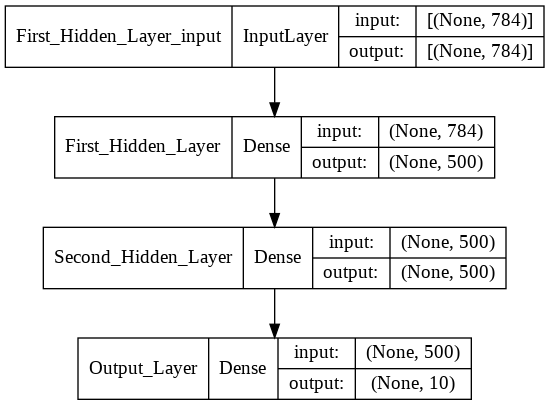

In [11]:
keras.utils.plot_model(model, show_shapes=True)

In [32]:
# Compile the model with crossentropy for the loss function
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [13]:
# Train the model on data for 30 epochs against the X and Y validation sets
history = model.fit(X_train_tr, y_train_tr, epochs=30, batch_size=32, validation_data=(X_train_v, y_train_v))

Epoch 1/30
1719/1719 [==============================] - 13s 6ms/step - loss: 0.5824 - accuracy: 0.8571 - val_loss: 0.3180 - val_accuracy: 0.9076
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2782 - accuracy: 0.9210 - val_loss: 0.2584 - val_accuracy: 0.9224
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2281 - accuracy: 0.9359 - val_loss: 0.2139 - val_accuracy: 0.9370
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1946 - accuracy: 0.9443 - val_loss: 0.1851 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1699 - accuracy: 0.9521 - val_loss: 0.1653 - val_accuracy: 0.9504
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1502 - accuracy: 0.9573 - val_loss: 0.1498 - val_accuracy: 0.9554
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1345 - accuracy: 0.9620 - val_loss: 0.1385 - val_accuracy

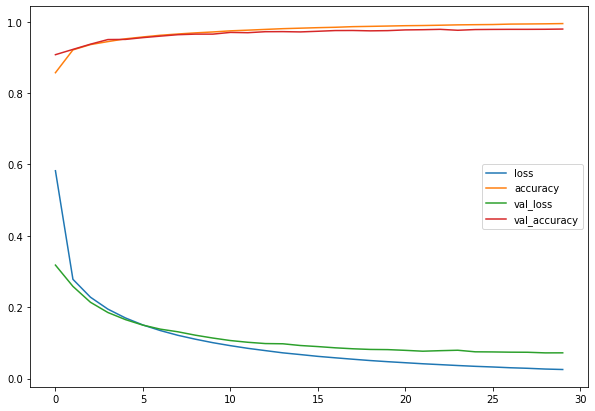

In [14]:
import pandas as pd
pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize=(10,7))

In [15]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9811


[0.06642207503318787, 0.9811000227928162]

# Answers for part 1
The loss and accuracy represent the data for the training set while the val_loss and val_accuracy represent the data for the validation sets tested against the training.
### Did the model become overfit after 30 epochs?
The validation loss and accuracy only get better as time goes on and follow the trend of the training loss and accuracy, so it doesn't appear that the model actually became overfit. After 30 epochs, the loss was 0.0254 and the accuracy was 0.9948 which shows the training model was working very well. The validation loss was 0.0721 and the validation accuracy was 0.9794 which is extremely close to the training model. So evaluating the model we see that the results for loss and accuracy are extremely close to what is expected. 
### At what epoch is the model overfit?
The model never becomes overfit and the accuracy only increases over the entire 30 epoch period. I suppose the model could be ran for an even larger number of epochs to see at what point it would finally become overfit. We will continue to train the model for another 20 epochs.

In [16]:
# run the model for another 20 epochs
history_2 = model.fit(X_train_tr, y_train_tr, epochs=20, validation_data=(X_train_v, y_train_v))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0240 - accuracy: 0.9952 - val_loss: 0.0708 - val_accuracy: 0.9796
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9957 - val_loss: 0.0811 - val_accuracy: 0.9766
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0212 - accuracy: 0.9962 - val_loss: 0.0703 - val_accuracy: 0.9806
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0200 - accuracy: 0.9964 - val_loss: 0.0696 - val_accuracy: 0.9810
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9967 - val_loss: 0.0693 - val_accuracy: 0.9798
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0178 - accuracy: 0.9973 - val_loss: 0.0706 - val_accuracy: 0.9804
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0169 - accuracy: 0.9976 - val_loss: 0.0686 - val_accuracy:

In [18]:
histories = pd.DataFrame(history.history)
histories = histories.append(pd.DataFrame(history_2.history), ignore_index=True)
histories

,loss,accuracy,val_loss,val_accuracy
0,0.582388,0.857073,0.317991,0.9076
1,0.278161,0.921018,0.258350,0.9224
2,0.228084,0.935873,0.213885,0.9370
3,0.194566,0.944273,0.185119,0.9500
4,0.169926,0.952055,0.165266,0.9504
5,0.150215,0.957255,0.149782,0.9554
6,0.134512,0.962018,0.138487,0.9596
7,0.121252,0.965564,0.131113,0.9636
8,0.110330,0.968709,0.121570,0.9652
9,0.100562,0.971273,0.113558,0.9652


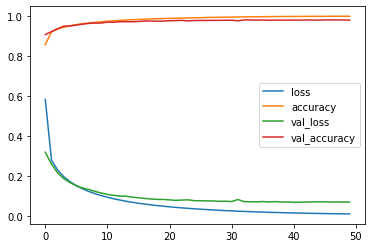

In [19]:
histories.plot()

In [21]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0634 - accuracy: 0.9817


[0.06336044520139694, 0.9817000031471252]

## Did the model finally become overfit?
Well, no it didn't. Even after 50 epochs the model remained pretty consistent with accuracy and loss compared to the validation set. I think the issue is the data that is being tested on is too simple. There just isn't enough opportunity for the model to start getting overfit by becoming too precise.
</br></br>At around epoch 35, the validation set bounces around an accuracy of 98 and 97 percent and remains pretty stable, while the training set reaches 99 percent accuracy. I don't think this discrepancy is large enough to be considered overfit.
</br></br>To conclude, The ending model evaluation is loss : 0.0634 and accuracy : 0.9817. This is pretty much the value of the validation set on the 50th epoch when training for the second time. Therefore, I don't see the model becoming overfit any time soon.

## Some of the misclassified images:

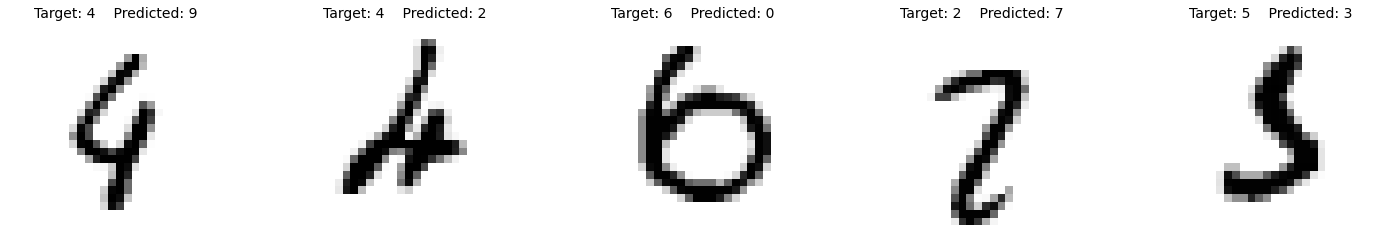

In [23]:
# using the code provided for showing misclassified images in the lesson notebook
# it simply loops through and when an incorrect prediction is found, adds it to the
# index of an array which is then shows.
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

predictions = np.argmax(model.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 0
for target, predict in zip(Y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(25,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[Y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

# Part 2: Modifying the model
Since the model is extremely accurate already, instead of trying to change the model to be more accurate, I will instead alter the model to see what affects different architecures will have. I'll attempt to make a model with a lot of layers but fewer neurons, then a model with lots of neurons but not focused on the number of layers.
## The model with many layers

In [24]:
# Model 2 focused on having many layers with fewer neurons
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Dense(100, activation="relu", input_shape=(784,), name="First_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Second_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Third_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Fourth_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Fifth_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Sixth_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Seventh_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Eighth_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Ninth_Hidden_Layer"))
model_2.add(keras.layers.Dense(100, activation="relu", name="Tenth_Hidden_Layer"))
model_2.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))

In [29]:
# Validate the model was created properly. We can see the params are a lot smaller
# than on the first model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_Layer (Dense)  (None, 100)               78500     
                                                                 
 Second_Hidden_Layer (Dense)  (None, 100)              10100     
                                                                 
 Third_Hidden_Layer (Dense)  (None, 100)               10100     
                                                                 
 Fourth_Hidden_Layer (Dense)  (None, 100)              10100     
                                                                 
 Fifth_Hidden_Layer (Dense)  (None, 100)               10100     
                                                                 
 Sixth_Hidden_Layer (Dense)  (None, 100)               10100     
                                                                 
 Seventh_Hidden_Layer (Dense  (None, 100)             

In [31]:
# Complie model 2 using the same specs as the first model
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [33]:
# We saw there wasn'tmuch of a point in going past 30 epochs for the last model
# so for this model we will go under the same assumption
model_2_history = model_2.fit(X_train_tr, y_train_tr, epochs=30, batch_size=32, validation_data=(X_train_v, y_train_v))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 1.5962 - accuracy: 0.4460 - val_loss: 0.4754 - val_accuracy: 0.8484
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3269 - accuracy: 0.9018 - val_loss: 0.2979 - val_accuracy: 0.9074
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1971 - accuracy: 0.9423 - val_loss: 0.1712 - val_accuracy: 0.9500
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1488 - accuracy: 0.9556 - val_loss: 0.2025 - val_accuracy: 0.9398
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1225 - accuracy: 0.9635 - val_loss: 0.1342 - val_accuracy: 0.9620
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1001 - accuracy: 0.9707 - val_loss: 0.1246 - val_accuracy: 0.9642
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0861 - accuracy: 0.9745 - val_loss: 0.1220 - val_accura

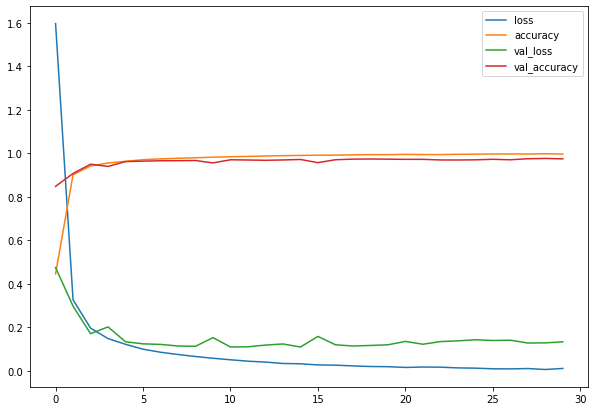

In [40]:
model_2_graph = pd.DataFrame(model_2_history.history).plot(figsize=(10,7))

In [35]:
model_2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1263 - accuracy: 0.9746


[0.12625090777873993, 0.9746000170707703]

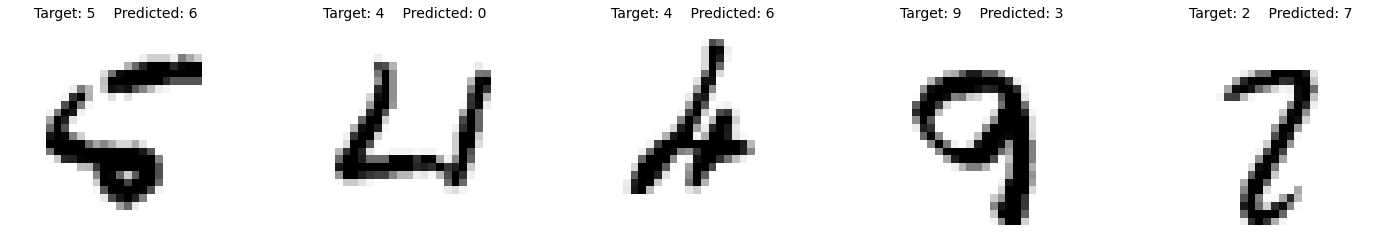

In [39]:
predictions = np.argmax(model_2.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 0
for target, predict in zip(Y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(25,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[Y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

## Evaluating Model 2
Comparing this model to the original model, it appears like this model is more inconsistent. The model starts off very unstable but quickly becomes more reliable in correctly identifying the numbers after around 4 epochs. The accuracy of the training model is actually very consistent with the previous model, but when compared to the validation model, it falls short. The training time of the model was also very similar to the first model, only 3 seconds longer per epoch.
</br></br>The values that were incorrectly predicted are actually a little more obvious than the prvious model. The 4th listed entry from the plot clearly shows a '9'. Any human could tell it's a 9 and there isn't much reason as to how it could be confused for a '3'. More mistakes like these are probably made due to the higher loss rate of this model.
</br></br>The validation set's accuracy is only about 1% less effective from the previous model, however the loss is almost double that of the previous. This is probably due to the weights on the hidden layers. This model and the prvious model both become pretty consistent around the 4-5 epoch mark, which means overall there isn't much of a difference in how the model performs. This second model is a little less consistent, but not enough to be very notable. I suspect that the lack of large differences might be due to the simplicity of the data set.

## The model with Many Neurons

In [41]:
# Model 3 focused on many neurons but not a lot of layers
model_3 = keras.models.Sequential()
model_3.add(keras.layers.Dense(5000, activation="relu", input_shape=(784,), name="First_Hidden_Layer"))
model_3.add(keras.layers.Dense(5000, activation="relu", name="Second_Hidden_Layer"))
model_3.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))
model_3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model_3_history = model_3.fit(X_train_tr, y_train_tr, epochs=30, batch_size=32, validation_data=(X_train_v, y_train_v))

Epoch 1/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5262 - accuracy: 0.8734 - val_loss: 0.3008 - val_accuracy: 0.9130
Epoch 2/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2612 - accuracy: 0.9268 - val_loss: 0.2417 - val_accuracy: 0.9272
Epoch 3/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2118 - accuracy: 0.9405 - val_loss: 0.1981 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.1784 - accuracy: 0.9499 - val_loss: 0.1682 - val_accuracy: 0.9546
Epoch 5/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.1542 - accuracy: 0.9571 - val_loss: 0.1500 - val_accuracy: 0.9590
Epoch 6/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.1347 - accuracy: 0.9622 - val_loss: 0.1347 - val_accuracy: 0.9630
Epoch 7/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.1193 - accuracy: 0.9671 - val_loss: 0.1248 -

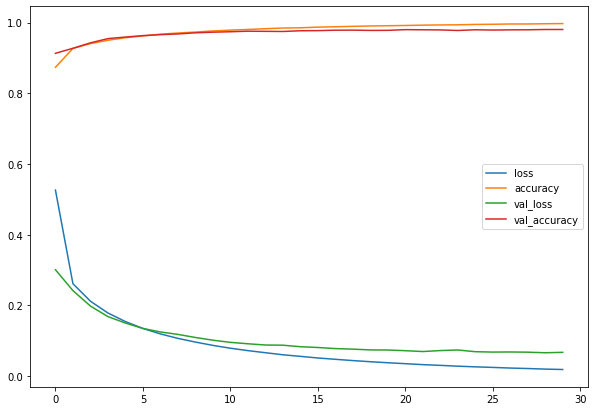

In [42]:
model_3_graph = pd.DataFrame(model_3_history.history).plot(figsize=(10,7))

In [43]:
model_3.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0617 - accuracy: 0.9801


[0.06165778264403343, 0.9800999760627747]

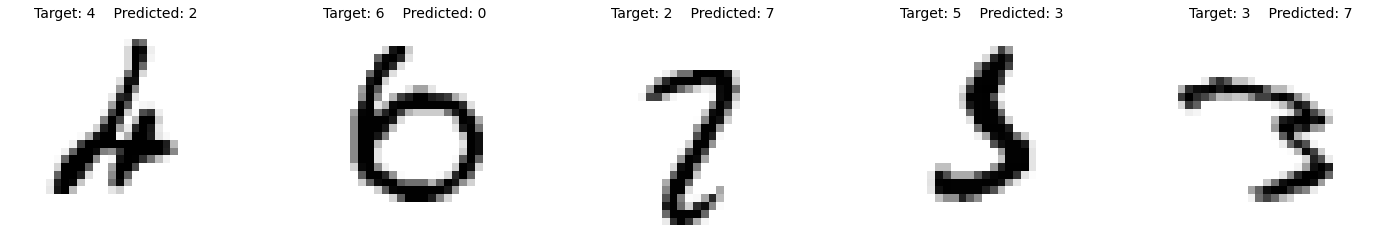

In [44]:
predictions = np.argmax(model_3.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 0
for target, predict in zip(Y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(25,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[Y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

# Evaluating Model 3
This model doesn't seem to perform much differently from the first model. The ending summary for this model is</br>loss: 0.0617 - accuracy: 0.9801</br> and the original model is</br>loss: 0.0634 - accuracy: 0.9817</br>so honestly there isn't much of a difference at all even though there are 10 times the amount of neurons per layer. The errors made by this model are also similar to the original model.</br></br>One huge difference in this model is the time it took to complete each epoch at 20 seconds vs. the original model's 7 seconds. Other than the time however, the models seem to stabilize around the same epoch and have the same performance, so increasing the amount of neurons had no notable effect. Could this be because the model before already had a sufficient amount of neurons at a number of 500? Is anything over 500 neurons per layer overkill and simply a waste of time and efficiency? I will create one final model that combines both increased neurons and layers to see if I can conclude how number of layers and number of neurons affect the model.
## Combination Model

In [45]:
# Model 4 with a combination of more neurons and more layers
model_4 = keras.models.Sequential()
model_4.add(keras.layers.Dense(2500, activation="relu", input_shape=(784,), name="First_Hidden_Layer"))
model_4.add(keras.layers.Dense(2000, activation="relu", name="Second_Hidden_Layer"))
model_4.add(keras.layers.Dense(1500, activation="relu", name="Third_Hidden_Layer"))
model_4.add(keras.layers.Dense(1000, activation="relu", name="Fourth_Hidden_Layer"))
model_4.add(keras.layers.Dense(500, activation="relu", name="Fifth_Hidden_Layer"))
model_4.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))
model_4.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model_4_history = model_4.fit(X_train_tr, y_train_tr, epochs=30, batch_size=32, validation_data=(X_train_v, y_train_v))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.5227 - accuracy: 0.8633 - val_loss: 0.2386 - val_accuracy: 0.9258
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1948 - accuracy: 0.9430 - val_loss: 0.1941 - val_accuracy: 0.9440
Epoch 3/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1381 - accuracy: 0.9593 - val_loss: 0.1250 - val_accuracy: 0.9658
Epoch 4/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1031 - accuracy: 0.9701 - val_loss: 0.1014 - val_accuracy: 0.9720
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0821 - accuracy: 0.9761 - val_loss: 0.0917 - val_accuracy: 0.9740
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0641 - accuracy: 0.9812 - val_loss: 0.0869 - val_accuracy: 0.9728
Epoch 7/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0504 - accuracy: 0.9858 - val_loss: 0.0778 - val_ac

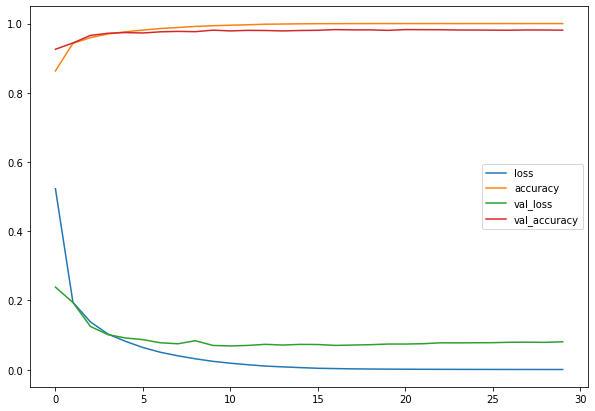

In [46]:
model_4_graph = pd.DataFrame(model_4_history.history).plot(figsize=(10,7))

In [47]:
model_4.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0764 - accuracy: 0.9822


[0.07637941837310791, 0.982200026512146]

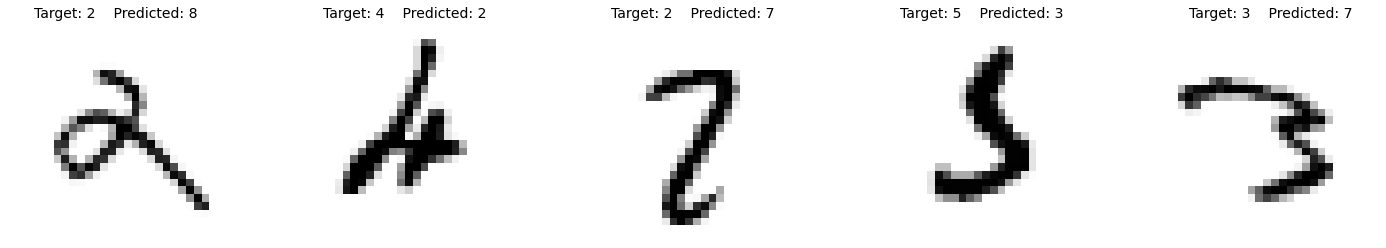

In [48]:
predictions = np.argmax(model_4.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 0
for target, predict in zip(Y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(25,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[Y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

# Evaluating Model 4
The final model ended up being the best. The training set actually became 100% accurate at epoch 19, which no other model was able to accomplish. It loss was also so small the value was insignificant. The model's final evaluation was</br>
loss: 0.0764 - accuracy: 0.9822</br>
and the original model was</br>
0.0634 - accuracy: 0.9817</br> which is actually surprising. The model appeared to be performing much better but ended up evaluating to around the same as the original model. It also was incorrectly identifying similar numbers to the other models. The time to complete each epoch was 14 seconds which is double the time for the first model but there are also many more neurons and layers than the first model so it wasn't as big of a slow down as expected. So this model ended up being the best, but not by a significant margin. 

# Part 3: Conclusion
The 4th and final model created did the best, but not by that large of a margin. It made use of more layers + more neurons making it more complex, but the end result wasn't very significant. I suspect that almost all models will perform well with this data set, so it isn't much of a fair test to begin with. Because it's easy to identify numbers, pretty much every model performs similarly.</br></br>It also seems like it is almost impossible to get a validation accuracy over ~98%. The training accuracy for the 4th model was 100% for 11 epochs, meaning it had a perfect grasp on how to identify numbers, yet it still only got a 98% on the validation test. I'm not sure how you could increase your validation set any further. Perhaps for an even longer period, but the return would be very low for the effort put in.</br></br>To conclude, I believe a model that is more complex will end up being more accurate. Simply changing one variable of the model didn't prove to be worthwhile. More neurons or more layers didn't have a substantial change because the changes are very simple. However, when changing the amount of neurons AND layers, the model suddenly becomes much more complex, helping refine its training.